In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import os.path

In [2]:
from sklearn import model_selection
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import learning_curve, train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import accuracy_score, mean_absolute_error, classification_report, confusion_matrix, f1_score, roc_curve, roc_auc_score
from sklearn.neural_network import MLPClassifier

## 1. Import Data

In [3]:
os.listdir('./datasets')

['X1_ICA_clusters.csv',
 'X1_PCA_clusters.csv',
 'X1_RCA_clusters.csv',
 'X1_RFC_clusters.csv',
 'y1_train.csv']

In [4]:
data = {}
data_lst = ['PCA', 'ICA', 'RCA', 'RFC']
role = ['X_train', 'Y_train']
Y_train = pd.read_csv('./datasets/y1_train.csv')
for i in os.listdir('./datasets'):
    if i.split('_')[0] == 'X1':
        data[i.split('_')[1]] = {}
        
        data[i.split('_')[1]]['X_train'] = pd.read_csv(f'./datasets/{i}')
        data[i.split('_')[1]]['Y_train'] = Y_train


In [32]:
list(data['PCA']['X_train'].columns)[:-2]

['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7']

In [43]:
data['ICA']['X_train'][['var1', 'var2', 'var3', 'var4', 'var5', 'var6']]

,var1,var2,var3,var4,var5,var6
0,0.016796,-0.017599,0.005208,0.013573,0.016217,0.018752
1,-0.006609,-0.007507,0.032813,0.012611,-0.001778,-0.012555
2,0.008738,-0.043550,0.021100,0.014864,-0.030298,-0.018553
3,-0.004937,0.035521,0.001196,-0.020466,-0.000341,0.017549
4,0.012981,-0.017715,-0.016724,-0.022921,-0.025021,-0.009461
...,...,...,...,...,...,...
3195,0.013083,0.002170,0.020500,0.015467,-0.009585,-0.020672
3196,-0.001978,0.006068,0.004427,-0.020796,-0.012990,-0.017049
3197,-0.005792,-0.032236,0.010868,-0.031477,-0.025206,-0.016404
3198,-0.019850,0.018485,0.005088,-0.020195,0.007325,-0.018823


In [28]:
data['RCA']['X_train'].iloc[:, : ]

,var1,var2,var3,var4,var5,var6,Kmeans_cluster,EM_cluster
0,-1.902367,0.906719,0.672417,-1.334384,1.232069,-1.720388,3,0
1,-2.557108,-0.133770,1.327158,-1.169185,0.185522,-0.038329,3,0
2,-3.831466,1.969754,0.672417,-0.600469,0.011098,0.136095,3,2
3,1.848281,0.437195,0.022349,1.245867,-1.470726,0.732874,1,1
4,0.573924,0.932939,-0.632393,-0.029772,-1.470726,0.732874,1,0
...,...,...,...,...,...,...,...,...
3195,-2.517842,0.331363,0.667744,-0.456760,-0.895084,1.046951,3,2
3196,0.883732,-0.031611,0.022349,0.601094,-1.470726,0.732874,1,1
3197,-0.080818,-0.500416,0.022349,-3.040291,-1.470726,0.732874,2,1
3198,1.848281,-1.403151,0.022349,0.351819,-1.063735,1.596907,1,4


In [31]:
list(data['RFC']['X_train'].columns)[0:-2]

['var1', 'var2', 'var3', 'var4', 'var5', 'var6']

## 2. Trainning ANN


In [51]:
def CV(data):
    
    import multiprocessing

    cores = multiprocessing.cpu_count()
    
    f1_cv = {}
    kfold = model_selection.KFold(n_splits = 5, random_state = 2, shuffle = True)
    variables = ['original', 'Kmeans_cluster', 'EM_cluster']
    
    
    for i in data_lst:
        f1_cv[i] = {}
        for j in range(3):
            
            columns = list(data[i]['X_train'].columns)[0 : -2]
            
            if j > 0:
                columns.append(variables[j])
            print(columns)
            ann = MLPClassifier(hidden_layer_sizes = (5, 5, 5, 5), activation = "relu",
                                    learning_rate_init = 0.1, random_state = 1)
#             ann = MLPClassifier()
            ann.fit(data[i]['X_train'][columns], data[i]['Y_train'])
            cv_results = cross_val_score(estimator = ann,
                                          X = data[i]['X_train'][columns],
                                          y = data[i]['Y_train'],
                                          cv = kfold,
                                          scoring = 'f1', 
                                          n_jobs = cores - 1)
            f1_cv[i][variables[j]] = cv_results.mean()
    
    
    return f1_cv

In [54]:
def CV2(data):
    
    import multiprocessing

    cores = multiprocessing.cpu_count()
    
    f1_cv = {}
    kfold = model_selection.KFold(n_splits = 5, random_state = 2, shuffle = True)
    variables = ['original', 'Kmeans_cluster', 'EM_cluster']
    
    
    for i in data_lst:
        f1_cv[i] = {}
        for j in range(3):
            
            columns = list(data[i]['X_train'].columns)[0 : -2]
            
            if j > 0:
                columns.append(variables[j])
            print(columns)
            ann = MLPClassifier(hidden_layer_sizes = (5, 5, 5, 5), activation = "relu",
                                    learning_rate_init = 0.1, random_state = 1)
#             ann = MLPClassifier()
            ann.fit(data[i]['X_train'][columns], data[i]['Y_train'])
            cv_results = cross_val_score(estimator = ann,
                                          X = data[i]['X_train'][columns],
                                          y = data[i]['Y_train'],
                                          cv = kfold,
                                          scoring = 'roc_auc', 
                                          n_jobs = cores - 1)
            f1_cv[i][variables[j]] = cv_results.mean()
    
    
    return f1_cv

In [52]:
f1_cv = CV(data)

['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7']


E:\Tools\Anaconda\conda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'Kmeans_cluster']


E:\Tools\Anaconda\conda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'EM_cluster']


E:\Tools\Anaconda\conda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


['var1', 'var2', 'var3', 'var4', 'var5', 'var6']


E:\Tools\Anaconda\conda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'Kmeans_cluster']


E:\Tools\Anaconda\conda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'EM_cluster']


E:\Tools\Anaconda\conda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


['var1', 'var2', 'var3', 'var4', 'var5', 'var6']


E:\Tools\Anaconda\conda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'Kmeans_cluster']


E:\Tools\Anaconda\conda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'EM_cluster']


E:\Tools\Anaconda\conda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


['var1', 'var2', 'var3', 'var4', 'var5', 'var6']


E:\Tools\Anaconda\conda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'Kmeans_cluster']


E:\Tools\Anaconda\conda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'EM_cluster']


E:\Tools\Anaconda\conda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [55]:
roc_cv = CV2(data) 

['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7']


E:\Tools\Anaconda\conda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'Kmeans_cluster']


E:\Tools\Anaconda\conda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'EM_cluster']


E:\Tools\Anaconda\conda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


['var1', 'var2', 'var3', 'var4', 'var5', 'var6']


E:\Tools\Anaconda\conda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'Kmeans_cluster']


E:\Tools\Anaconda\conda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'EM_cluster']
['var1', 'var2', 'var3', 'var4', 'var5', 'var6']


E:\Tools\Anaconda\conda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\Tools\Anaconda\conda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'Kmeans_cluster']


E:\Tools\Anaconda\conda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'EM_cluster']


E:\Tools\Anaconda\conda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


['var1', 'var2', 'var3', 'var4', 'var5', 'var6']


E:\Tools\Anaconda\conda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'Kmeans_cluster']


E:\Tools\Anaconda\conda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'EM_cluster']


E:\Tools\Anaconda\conda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [53]:
f1_cv

{'PCA': {'original': 0.4102146159402845,
  'Kmeans_cluster': 0.41364123729095903,
  'EM_cluster': 0.48861647507080325},
 'ICA': {'original': 0.11621621621621621,
  'Kmeans_cluster': 0.5035125672164211,
  'EM_cluster': 0.0},
 'RCA': {'original': 0.4781864047317893,
  'Kmeans_cluster': 0.4032759357554524,
  'EM_cluster': 0.40089698465933693},
 'RFC': {'original': 0.4676667625656399,
  'Kmeans_cluster': 0.49649430659802996,
  'EM_cluster': 0.3976090021155917}}

In [56]:
roc_cv

{'PCA': {'original': 0.7246927158665775,
  'Kmeans_cluster': 0.708113630357471,
  'EM_cluster': 0.7147765857068302},
 'ICA': {'original': 0.5480341088860594,
  'Kmeans_cluster': 0.7170934580866405,
  'EM_cluster': 0.5},
 'RCA': {'original': 0.7149959832712134,
  'Kmeans_cluster': 0.7081464088309406,
  'EM_cluster': 0.7194364399885255},
 'RFC': {'original': 0.7623206800015715,
  'Kmeans_cluster': 0.7521755622033279,
  'EM_cluster': 0.7357650588122936}}

In [57]:
ori, km, em = list(), list(), list()
for i in roc_cv.values():
    ori.append(i['original'])
    km.append(i['Kmeans_cluster'])
    em.append(i['EM_cluster'])

In [47]:
ori, km, em = list(), list(), list()
for i in f1_cv.values():
    ori.append(i['original'])
    km.append(i['Kmeans_cluster'])
    em.append(i['EM_cluster'])
print(ori)

[0.5262403206341826, 0.11263537906137182, 0.46909628286901467, 0.515475942640459]


In [10]:
def plot_bar(ori, km, em):
    
    plt.style.use('seaborn')
    
    N = 4
    ind = np.arange(N)  # the x locations for the groups
    width = 0.2
    variables = ['original', 'Kmeans_cluster', 'EM_cluster']
    color_schema = ['#ffcb77', '#17c3b2', '#227c9d']
    data_lst = [ori, km, em]
    
    fig = plt.figure()
    ax = fig.add_subplot()
    for i, value in enumerate(color_schema):
        rects = ax.bar(ind + width * i, data_lst[i], width, color = value)
        
    ax.set_ylabel('F1 Scores')
    ax.set_title('F1 Scores for ANN in CV')
    ax.set_xticks(ind + width)
    ax.set_xticklabels( (f1_cv.keys()) )

    ax.legend( ['original', 'Kmeans_cluster', 'EM_cluster'], bbox_to_anchor = (1.05, 0.6))
    plt.show()

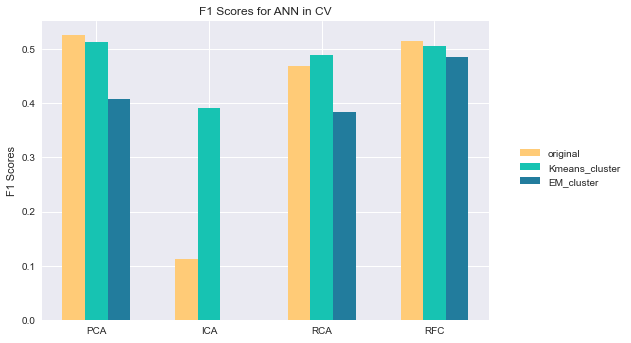

In [48]:
plot_bar(ori, km, em)

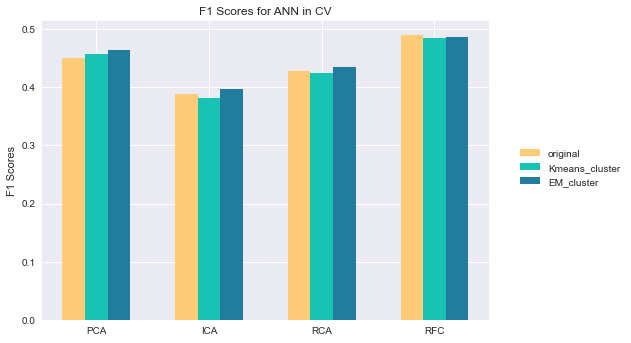

In [22]:
plot_bar(ori, km, em)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 5
menMeans = (20, 35, 30, 35, 27)
menStd =   (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, menMeans, width, color='royalblue', yerr=menStd)

womenMeans = (25, 32, 34, 20, 25)
womenStd =   (3, 5, 2, 3, 3)
rects2 = ax.bar(ind+width, womenMeans, width, color='seagreen', yerr=womenStd)

# add some
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( ('G1', 'G2', 'G3', 'G4', 'G5') )

ax.legend( (rects1[0], rects2[0]), ('Men', 'Women') )

plt.show()